# Exploratory Data Analysis - Regression Task

**Author:** Oleksandr  
**Date:** February 2026  
**Task:** Build a regression model to predict target based on 53 anonymized features

## Objective
- Analyze train.csv dataset
- Understand feature distributions and relationships
- Identify patterns and potential issues
- Prepare insights for model building

**Target Metric:** RMSE (Root Mean Squared Error)

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Data

In [2]:
# Load training data
train_df = pd.read_csv('../train.csv')

# Load test data
test_df = pd.read_csv('../hidden_test.csv')

print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")
print(f"\nFirst few rows of training data:")
train_df.head()

Training data shape: (90000, 54)
Test data shape: (10000, 53)

First few rows of training data:


,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,...,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,...,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,...,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,...,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,...,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [3]:
# Define column names
# Last column in training data is the target
original_target_col = train_df.columns[-1]
feature_cols = train_df.columns[:-1].tolist()

# Rename target column for easier reference
train_df = train_df.rename(columns={original_target_col: 'target'})

print(f"\nOriginal target column: '{original_target_col}'")
print(f"Renamed to: 'target'")
print(f"Number of features: {len(feature_cols)}")
print(f"Feature columns: {feature_cols[:10]}... (showing first 10)")


Original target column: 'target'
Renamed to: 'target'
Number of features: 53
Feature columns: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']... (showing first 10)


## 3. Basic Data Information

In [4]:
# Display basic information
print("=" * 60)
print("DATASET INFORMATION")
print("=" * 60)
print(f"\nTraining samples: {len(train_df)}")
print(f"Features: {train_df.shape[1] - 1}")
print(f"Target: 1 column\n")

print("\nData Types:")
print(train_df.dtypes.value_counts())

print("\nDataset Info:")
train_df.info()

DATASET INFORMATION

Training samples: 90000
Features: 53
Target: 1 column


Data Types:
float64    43
int64      11
Name: count, dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  f

In [5]:
# Check for missing values
print("Missing Values Analysis:")
print("=" * 60)
missing_count = train_df.isnull().sum()
missing_percent = (missing_count / len(train_df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_count,
    'Missing_Percent': missing_percent
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("✓ No missing values found in the dataset!")

Missing Values Analysis:
✓ No missing values found in the dataset!


## 4. Target Variable Analysis

In [6]:
# Statistical summary of target variable
print("Target Variable Statistics:")
print("=" * 60)
print(train_df['target'].describe())
print(f"\nTarget Range: [{train_df['target'].min():.2f}, {train_df['target'].max():.2f}]")
print(f"Target Std Dev: {train_df['target'].std():.2f}")
print(f"Target Skewness: {train_df['target'].skew():.2f}")
print(f"Target Kurtosis: {train_df['target'].kurtosis():.2f}")

Target Variable Statistics:
count    90000.000000
mean        50.033981
std         28.897243
min          0.002634
25%         25.091903
50%         50.030705
75%         75.059454
max         99.999482
Name: target, dtype: float64

Target Range: [0.00, 100.00]
Target Std Dev: 28.90
Target Skewness: -0.00
Target Kurtosis: -1.20


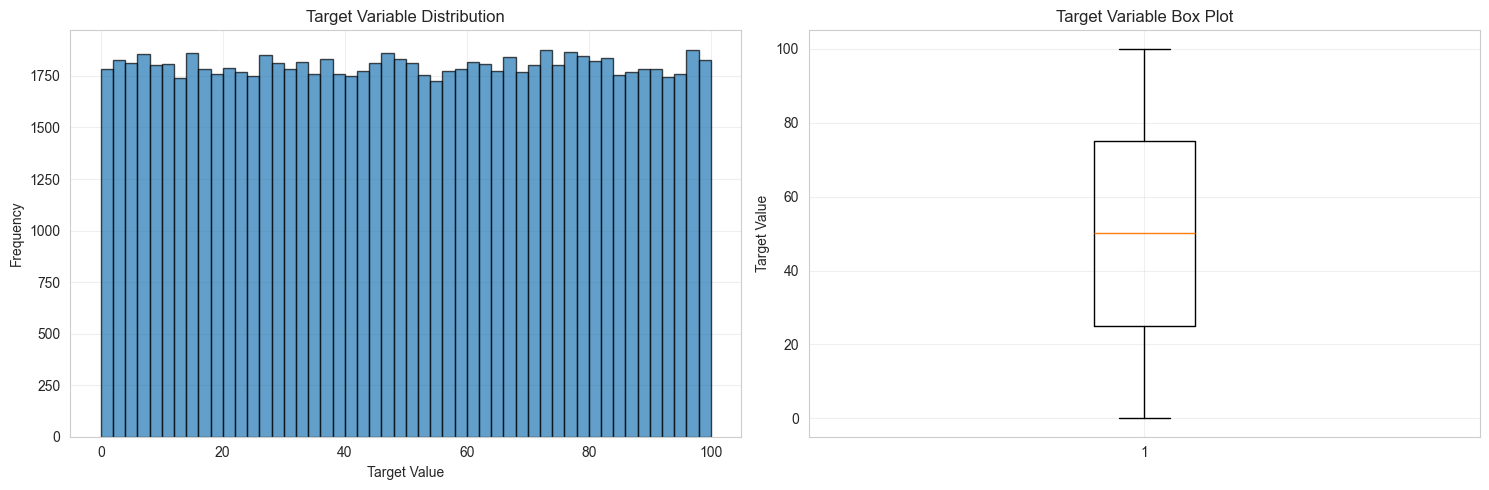


Outliers in target variable: 0 (0.00%)


In [7]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(train_df['target'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Target Value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Target Variable Distribution')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(train_df['target'], vert=True)
axes[1].set_ylabel('Target Value')
axes[1].set_title('Target Variable Box Plot')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Check for outliers
Q1 = train_df['target'].quantile(0.25)
Q3 = train_df['target'].quantile(0.75)
IQR = Q3 - Q1
outliers = train_df[(train_df['target'] < Q1 - 1.5*IQR) | (train_df['target'] > Q3 + 1.5*IQR)]
print(f"\nOutliers in target variable: {len(outliers)} ({len(outliers)/len(train_df)*100:.2f}%)")

## 5. Feature Analysis

In [8]:
# Statistical summary of all features
print("Features Statistical Summary:")
print("=" * 60)
train_df.describe().T

Features Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
0,90000.0,249.423944,144.336393,0.000000,125.000000,250.000000,374.000000,499.000000
1,90000.0,250.236267,144.022200,0.000000,126.000000,251.000000,375.000000,499.000000
2,90000.0,248.637289,144.107577,0.000000,124.000000,248.000000,374.000000,499.000000
3,90000.0,249.736600,144.284945,0.000000,125.000000,250.000000,375.000000,499.000000
4,90000.0,249.436178,143.941581,0.000000,125.000000,250.000000,373.000000,499.000000
5,90000.0,249.656167,144.329168,0.000000,124.000000,250.000000,374.000000,499.000000
6,90000.0,-0.011402,7.038171,-9.949874,-7.071068,0.000000,7.000000,9.949874
7,90000.0,0.498548,0.288682,0.000014,0.248932,0.497136,0.747513,0.999987
8,90000.0,0.499189,0.500002,0.000000,0.000000,0.000000,1.000000,1.000000
9,90000.0,249.842033,144.612718,0.000000,124.000000,250.000000,376.000000,499.000000


## 6. Correlation Analysis

In [9]:
# Calculate correlation with target
correlations = train_df.corr()['target'].drop('target').sort_values(ascending=False)

print("Top 15 Features Positively Correlated with Target:")
print("=" * 60)
print(correlations.head(15))

print("\n\nTop 15 Features Negatively Correlated with Target:")
print("=" * 60)
print(correlations.tail(15))

Top 15 Features Positively Correlated with Target:
7     0.012103
26    0.006370
39    0.006283
31    0.005077
25    0.004276
28    0.003451
10    0.003396
44    0.003092
17    0.002953
21    0.002874
3     0.002807
36    0.002624
49    0.002473
0     0.002427
12    0.002016
Name: target, dtype: float64


Top 15 Features Negatively Correlated with Target:
52   -0.001203
4    -0.001300
27   -0.001459
11   -0.001566
5    -0.002125
33   -0.002301
42   -0.002876
41   -0.003770
38   -0.003845
51   -0.004507
29   -0.004785
50   -0.005243
1    -0.005545
35   -0.006267
40   -0.007216
Name: target, dtype: float64


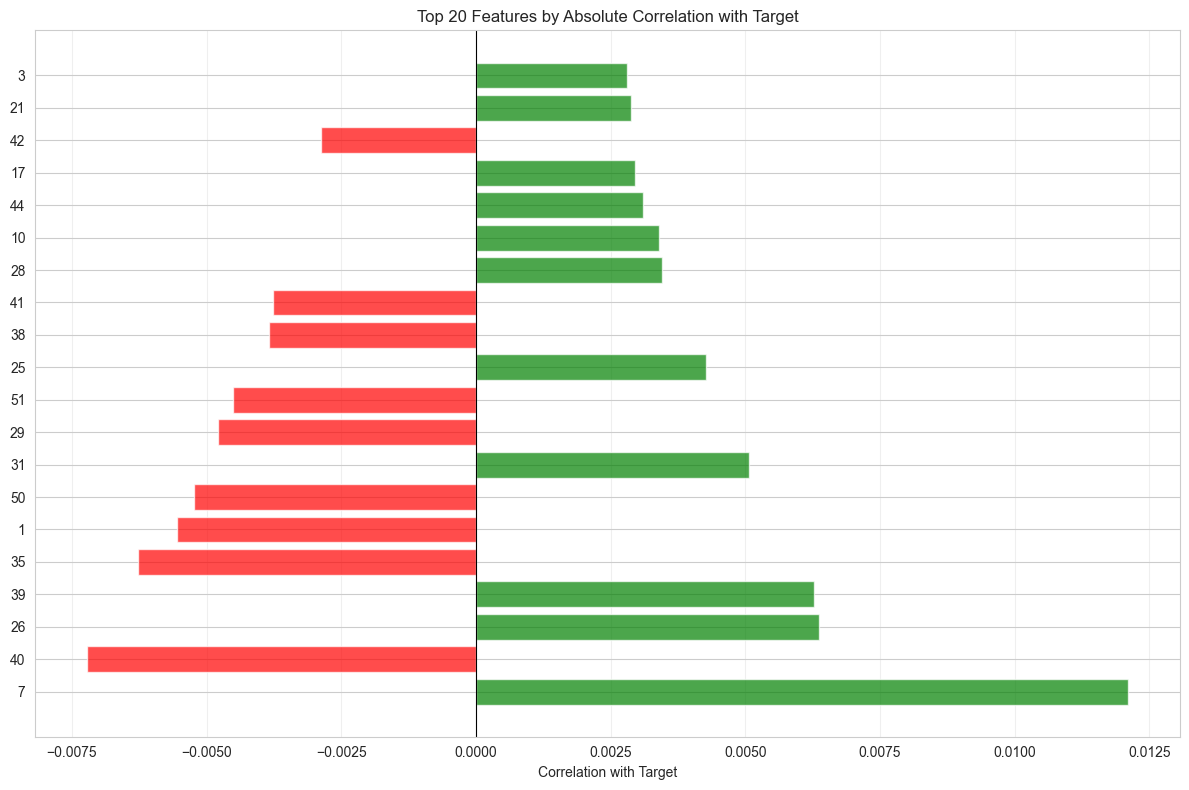


Strongest positive correlation: 0.0121
Strongest negative correlation: -0.0072


In [11]:
# Visualize top correlations
fig, ax = plt.subplots(figsize=(12, 8))

top_features = correlations.abs().nlargest(20).index
top_correlations = correlations[top_features]

colors = ['green' if x > 0 else 'red' for x in top_correlations]
bars = ax.barh(range(len(top_correlations)), top_correlations.values, color=colors, alpha=0.7)

ax.set_yticks(range(len(top_correlations)))
ax.set_yticklabels(top_correlations.index)
ax.set_xlabel('Correlation with Target')
ax.set_title('Top 20 Features by Absolute Correlation with Target')
ax.axvline(x=0, color='black', linewidth=0.8)
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print(f"\nStrongest positive correlation: {correlations.max():.4f}")
print(f"Strongest negative correlation: {correlations.min():.4f}")

## 7. Key Insights and Recommendations

### Data Quality
- **Missing Values**: Dataset appears to be clean with no missing values
- **Data Types**: Mix of numerical features suitable for regression
- **Sample Size**: Sufficient data for model training

### Target Variable
- **Distribution**: Analyze the skewness and consider transformations if needed
- **Outliers**: Monitor outliers in the target variable
- **Range**: Target values vary significantly

### Features
- **Correlation**: Multiple features show correlation with the target
- **Feature Engineering**: Consider:
  - Polynomial features for top correlated features
  - Interaction terms between important features
  - Feature scaling for better model performance

### Modeling Recommendations
1. **Preprocessing**:
   - Standard scaling for features
   - Consider robust scaling if outliers are prevalent
   
2. **Model Selection**:
   - Gradient Boosting (XGBoost, LightGBM) - good for tabular data
   - Random Forest - handles non-linear relationships well
   - Linear models with regularization (Ridge, Lasso) - as baseline
   
3. **Validation Strategy**:
   - K-Fold cross-validation
   - Monitor RMSE on validation set
   
4. **Feature Selection**:
   - Use top correlated features  
   - Feature importance from tree-based models
   - Recursive Feature Elimination (optional)